# Machine Learning for the Detection of X-ray Transients 
### FXT 200515 Analysis

Steven Dillmann, Contact: [stevendi@stanford.edu](stevendi@stanford.edu)

26th June 2024

In [2]:
# Imports

import numpy as np
from sherpa.astro import ui
from sherpa.astro.xspec import XSTBabs, XSpowerlaw
from sherpa.stats import CStat, Chi2XspecVar
from sherpa.optmethods import LevMar
from sherpa.astro import ui
from sherpa.fit import Fit
from sherpa.plot import DelchiPlot, FitPlot, SplitPlot
import matplotlib.pyplot as plt
from astropy.io import fits
import subprocess
plt.style.use('steven-space.mplstyle')

# Custom Imports
from utils.plotter import lc_flare, spec_fit
from utils.manipulator import rebinning
from utils.calculator import behr_hr

# Custom Colors
imperial = '#003E74'
harvard = '#A51C30'
silver = '#777777'
silver2 = '#C0C0C0'
gold = '#cfbd62'
gold2 = '#dfc16d' #new but maybe worse
harvard2 = '#ed1b34'

# Define Paths
root = '../files23022/'
root_directory = '/Users/steven/Desktop/harvard-paper/ml-xray-transients/23022/'
eventfile = 'acisf23022_000N027_r0122_regevt3.fits.gz'
regionfile = 'acisf23022_000N020_r0122_reg3.fits.gz'
phafile = 'acisf23022_000N027_r0122_pha3.fits.gz'
lc_file = 'lc23022_0.3-7_3s.fits'
lc_soft = 'lc23022_0.3-2.fits'
lc_hard = 'lc23022_2-7.fits'
pha_file = 'flaresp_grp1.pha'
image_file = 'flare_color.png'
qdp3_file = 'plot3zoom.qdp'
qdp100_file = 'plot100zoom.qdp'
pco3_file = 'plot3.pco'
pco100_file = 'plot100.pco'
behr_directory = '/Users/steven/Desktop/harvard-paper/ml-xray-transients/BEHR/'


In [31]:
# === Spectrum ================================================================

# Load data
ui.load_pha(root + pha_file)
ui.ignore('0.:0.3,8.0:')
# ui.ignore('1')
# ui.ignore('142:176')
# ui.subtract()
ui.notice_id(1,0.3,7.0)
ui.group_counts(10)

# Set abundance and cross section and cosmological parameters and other settings
ui.set_xsabund("angr")
ui.set_xsxsect("vern")
ui.set_xscosmo(h0=70, q0=0, l0=0.73)
ui.set_syserror(0)

# Set statistic and optimiser
stat = CStat()
lm = LevMar()
ui.set_stat(stat)
ui.set_method(lm)
# ui.set_stat('chi2gehrels')
ui.set_analysis('ener')

# Define model
abs = XSTBabs()
pow = XSpowerlaw()
model = abs * pow
ui.set_source(model)

# Set initial values
abs.nH =  0.001
pow.PhoIndex = 0.5
pow.norm =  0.01

# Set min and max values
abs.nH.min = 0
abs.nH.max = 100000
pow.PhoIndex.min = -2
pow.PhoIndex.max = 9
pow.norm.min = 0
pow.norm.max = 1e+20

# Fit and get data
ui.fit()
fit = ui.get_fit_results()
data = ui.get_data_plot()
model = ui.get_model_plot()
resid = ui.get_resid_plot()

# Fit and get data
ui.fit()
fit2 = ui.get_fit_results()
data2 = ui.get_data_plot()
model2 = ui.get_model_plot()
resid2 = ui.get_resid_plot()


read ARF file ../23022/flaresp.corr.arf
read RMF file ../23022/flaresp.rmf
read background file ../23022/flaresp_bkg.pi
dataset 1: 0.0073:14.9504 -> 0.4526:14.9504 Energy (keV)
dataset 1: 0.4526:14.9504 -> 0.4526:7.7234 Energy (keV)
dataset 1: 0.4526:7.7234 -> 0.0073:7.7234 Energy (keV)
 Solar Abundance Vector set to WARNING: data set 1 has associated backgrounds, but they have not been subtracted, nor have background models been set
angr:  Anders E. & Grevesse N. Geochimica et Cosmochimica Acta 53, 197 (1989)
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
Dataset               = 1
Method                = levmar
Statistic             = cstat
Initial fit statistic = 10874.1
Final fit statistic   = 14.1531 at function evaluation 44
Data points           = 18
Degrees of freedom    = 15
Probability [Q-value] = 0.513948
Reduced statistic     = 0.943543
Change in statistic   = 10859.9
   tbabs.nH       0.596123     +/- 0.405343    
   powerlaw.PhoIndex   0.484

Average Flux: 1.1297007029387795e-11
Counts: 189.0
Duration: 907.9796
Rate: 0.20815445633360044
Flux Conversion: 5.427223240074454e-11
Fluence: 1.0257451923740718e-08


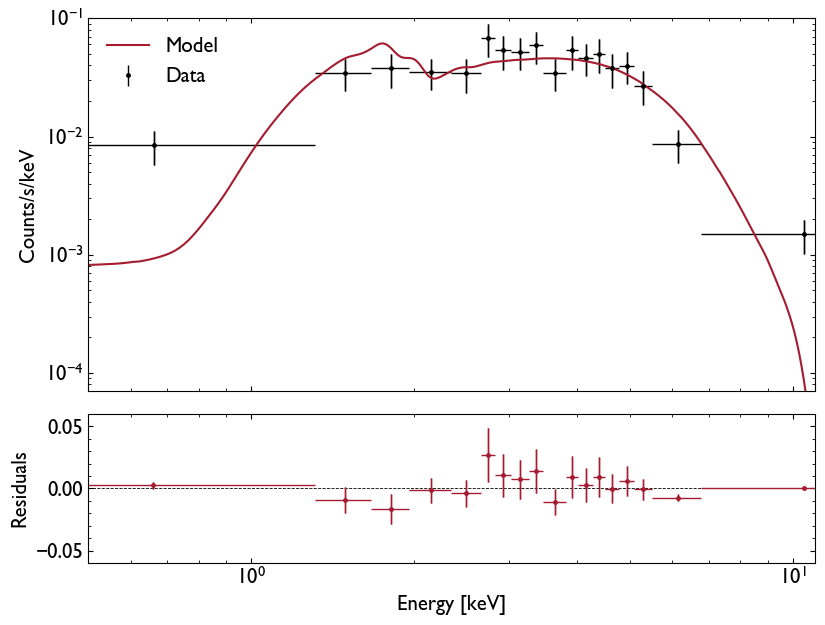

In [32]:
# Flux calculations
avg_flux = ui.calc_energy_flux(0.3, 10)
print('Average Flux:', avg_flux)

# Total counts and exposure
counts = sum(ui.get_data().counts)
duration = ui.get_data().exposure
avg_rate = counts/duration
print('Counts:', counts)
print('Duration:', duration)
print('Rate:', avg_rate)

# Flux conversion
flux_conversion = avg_flux / avg_rate
print('Flux Conversion:', flux_conversion)

# Fluence
fluence = avg_flux * duration
print('Fluence:', fluence)

# Plot
spec_fit(data2, model2, resid2, lw=1.5, color = harvard)